In [30]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
from scipy.fftpack import next_fast_len
from scipy.io import loadmat
from scipy.ndimage import gaussian_filter1d
from scipy.signal import filtfilt, hilbert, remez, lfilter



In [3]:
def make_bandpass_filter(sampling_frequency, BAND_OF_INTEREST = [150, 250], 
                         TRANSITION_BAND = 25, ORDER = 101):
    """
    Make a bandpass filter for the given sampling frequency and band of interest.
    
    Parameters
    ----------
    sampling_frequency : float
        The sampling frequency of the signal.
    BAND_OF_INTEREST : list of float
        The band of interest, in Hz.
    TRANSITION_BAND : float
        The transition band, in Hz.size of the roll off in the filter knernel
    ORDER : int
        The order of the filter. The higher the order the better the filter, but the longer it takes to compute.
        
        
    Returns
    -------
    filter : array_like
        The filter.
    
    
    """
    nyquist = 0.5 * sampling_frequency
    desired = [
        0,
        BAND_OF_INTEREST[0] - TRANSITION_BAND,
        BAND_OF_INTEREST[0],
        BAND_OF_INTEREST[1],
        BAND_OF_INTEREST[1] + TRANSITION_BAND,
        nyquist,
    ]
    return remez(ORDER, desired, [0, 1, 0], Hz=sampling_frequency), 1.0

In [4]:
def plot_response(w, h, title):
    "Utility function to plot response functions"
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(w, 20*np.log10(np.abs(h)))
    ax.set_ylim(-40, 5)
    ax.grid(True)
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Gain (dB)')
    ax.set_title(title)

The transition

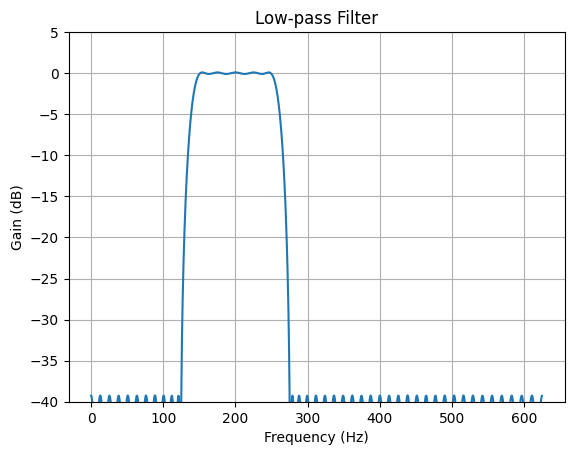

In [5]:
fs = 1250

taps = make_bandpass_filter(sampling_frequency=fs)

w, h = signal.freqz(taps[0], [1], worN=2000, fs=fs) # this is for plotting the filter just to visualize it
plot_response(w, h, "Low-pass Filter")
plt.show()

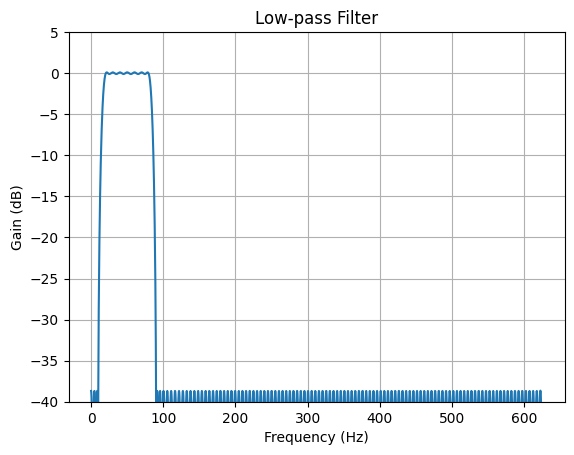

In [10]:
# gamma filter
fs = 1250

taps = make_bandpass_filter(sampling_frequency=fs, BAND_OF_INTEREST = [20, 80],
                            TRANSITION_BAND = 10, ORDER = 250)


w, h = signal.freqz(taps[0], [1], worN=2000, fs=fs) # this is for plotting the filter just to visualize it
plot_response(w, h, "Low-pass Filter")
plt.show()

In [13]:
import numpy as np
from scipy.signal import chirp

# Constants
sampling_rate = 1250  # Hz
duration = 3  # seconds
t = np.arange(0, duration, 1/sampling_rate)  # time array

# Base signal
base_signal = np.sin(2 * np.pi * 50 * t)

# Function to generate a "jump" signal
def generate_jump_signal(freq_range, duration, total_duration):
    start_freq, end_freq = freq_range
    freq = np.random.uniform(start_freq, end_freq)
    jump_signal = chirp(t[:int(duration*sampling_rate)], f0=freq, f1=freq, t1=duration, method='linear')
    return np.pad(jump_signal, (0, int(total_duration*sampling_rate) - len(jump_signal)))

# Generate "jump" signals
jump_signals = [generate_jump_signal(freq_range, jump_duration, duration) 
                for freq_range, jump_duration in [((150, 250), 0.03), ((150, 250), 0.03), ((20, 80), 0.4), ((20, 80), 0.4)]]

# Generate "double jump" signal
double_jump_signal = generate_jump_signal((150, 250), 0.03, duration) + generate_jump_signal((20, 80), 0.4, duration)

# Insert "jump" signals into base signal at random locations
for jump_signal in jump_signals:
    start_index = np.random.randint(0, len(base_signal) - len(jump_signal))
    base_signal[start_index:start_index+len(jump_signal)] += jump_signal

# Insert "double jump" signal into base signal at a random location
start_index = np.random.randint(0, len(base_signal) - len(double_jump_signal))
base_signal[start_index:start_index+len(double_jump_signal)] += double_jump_signal

ValueError: high <= 0

the taps variable contains the signal in the first entry in the tupple, and the second 

In [18]:
taps

(array([ 4.24601371e-03, -2.37286140e-03, -8.53694193e-04,  3.74666399e-04,
         1.04998483e-03,  1.10210785e-03,  6.36138581e-04, -1.42323429e-04,
        -9.89354121e-04, -1.69783150e-03, -2.12625535e-03, -2.22513275e-03,
        -2.01822046e-03, -1.59246644e-03, -1.05858610e-03, -5.37442382e-04,
        -1.27491897e-04,  9.64673194e-05,  1.01322020e-04, -1.14575449e-04,
        -5.15329107e-04, -1.03533914e-03, -1.60424845e-03, -2.11046261e-03,
        -2.49444507e-03, -2.66956162e-03, -2.59572834e-03, -2.28538779e-03,
        -1.76848338e-03, -1.11949550e-03, -4.44299138e-04,  1.38107638e-04,
         5.31425643e-04,  6.62399080e-04,  5.03525934e-04,  7.57663720e-05,
        -5.37901689e-04, -1.21632711e-03, -1.81441484e-03, -2.19878176e-03,
        -2.25954589e-03, -1.94225831e-03, -1.25094138e-03, -2.68226479e-04,
         8.76532375e-04,  2.00228371e-03,  2.94195850e-03,  3.53931004e-03,
         3.70301369e-03,  3.41464828e-03,  2.73792645e-03,  1.81153868e-03,
         8.3

In [20]:
import numpy as np

# Constants
sampling_rate = 1250  # Hz
duration = 0.25  # seconds
t = np.arange(0, duration, 1/sampling_rate)  # time array

# Frequency
freq = np.random.uniform(150, 200)

# Generate high-frequency signal
high_freq_signal = np.sin(2 * np.pi * freq * t)

# Generate noise signal
noise_duration = 1  # seconds
noise_signal = 0.1 * np.random.normal(0, 1, int(noise_duration * sampling_rate))

# Insert high-frequency signal into noise signal
start_index = len(noise_signal) // 2 - len(high_freq_signal) // 2
noise_signal[start_index:start_index+len(high_freq_signal)] = high_freq_signal

In [23]:
import numpy as np

# Define the parameters
sampling_rate = 1000  # in Hz
duration = 1.0  # in seconds
frequency = np.random.uniform(10, 40)  # random frequency between 10 and 40 Hz
amplitude = 0.1  # low amplitude
time = np.arange(0, duration, 1/sampling_rate)  # time array

# Create the signal
signal = amplitude * np.sin(2 * np.pi * frequency * time)

# Add some noise
noise_signal = signal + 0.01 * np.random.normal(0, 1, len(time))

# Insert high-frequency signal into noise signal
start_index = len(noise_signal) // 2 - len(high_freq_signal) // 2
noise_signal[start_index:start_index+len(high_freq_signal)] = high_freq_signal

<function matplotlib.pyplot.show(close=None, block=None)>

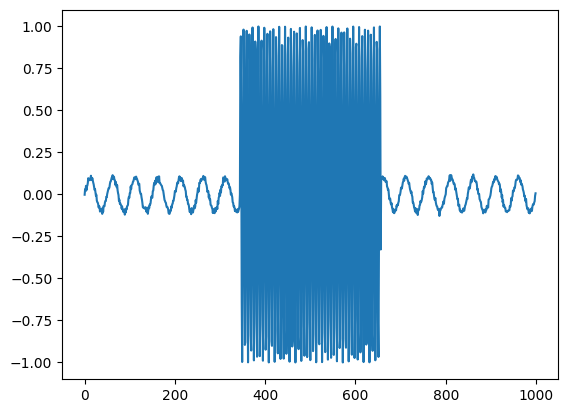

In [24]:
plt.plot(noise_signal)
plt.show

In [ ]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html

# if you convolve your filter with your signal it should jsut return the filtered signal 

In [1]:
convolved_signal = lfilter(taps[0], taps[1], lfp_ca1[:,highest_rip_power.argmax()])

plt.plot(convolved_signal)
plt.show()

NameError: name 'lfilter' is not defined

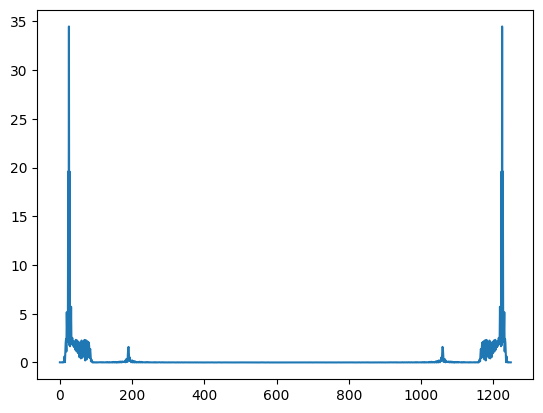

In [27]:
convolved_signal = np.convolve(taps[0], noise_signal, mode='full')

plt.plot(np.abs(np.fft.fft(convolved_signal)))
plt.show()